Homework 5:  CSCI 6364/4364

In this assignment, you will become familiar with the deep learning library Pytorch through the construction of a feed-forward neural network and a convolutional neural network applied to the MNIST dataset.  In various parts of the notebook, there will be places to fill in.

In [12]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
SEED = 1
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

Download and use the MNIST dataset from Homework 1.

In [13]:
dataset_filename = './data_mnist.csv'
df = pd.read_csv(dataset_filename)
print(df.shape)

(42000, 785)


In [14]:
y =  df.iloc[:, 0].values
X =  df.iloc[:, 1:].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [15]:
print(y_test.shape)

(6300,)


In [16]:
BATCH_SIZE = 32

torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

In [17]:
input_dim = 784
output_dim = 10
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim,250)
        self.linear2 = nn.Linear(250,100)
        self.linear3 = nn.Linear(100,output_dim)
    
    def forward(self,X):
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)
 
mlp = MLP()
print(mlp)

MLP(
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


In [18]:
def fit(model, train_loader):
    optimizer = torch.optim.Adam(model.parameters())
    error = nn.CrossEntropyLoss()
    EPOCHS = 5
    model.train()
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()

            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == var_y_batch).sum()
            #print(correct)
            if batch_idx % 50 == 0:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(X_batch), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.data, float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))

In [19]:
fit(mlp, train_loader)

Epoch : 0 [0/35700 (0%)]	Loss: 12.631650	 Accuracy:9.375%
Epoch : 0 [1600/35700 (4%)]	Loss: 0.413063	 Accuracy:67.525%
Epoch : 0 [3200/35700 (9%)]	Loss: 0.714282	 Accuracy:75.650%
Epoch : 0 [4800/35700 (13%)]	Loss: 0.155664	 Accuracy:79.760%
Epoch : 0 [6400/35700 (18%)]	Loss: 0.504988	 Accuracy:81.748%
Epoch : 0 [8000/35700 (22%)]	Loss: 0.519483	 Accuracy:83.342%
Epoch : 0 [9600/35700 (27%)]	Loss: 0.769362	 Accuracy:84.396%
Epoch : 0 [11200/35700 (31%)]	Loss: 0.453339	 Accuracy:85.363%
Epoch : 0 [12800/35700 (36%)]	Loss: 0.251225	 Accuracy:86.183%
Epoch : 0 [14400/35700 (40%)]	Loss: 0.254150	 Accuracy:86.620%
Epoch : 0 [16000/35700 (45%)]	Loss: 0.310942	 Accuracy:87.045%
Epoch : 0 [17600/35700 (49%)]	Loss: 0.481484	 Accuracy:87.313%
Epoch : 0 [19200/35700 (54%)]	Loss: 0.082965	 Accuracy:87.765%
Epoch : 0 [20800/35700 (58%)]	Loss: 0.112241	 Accuracy:88.158%
Epoch : 0 [22400/35700 (63%)]	Loss: 0.195661	 Accuracy:88.463%
Epoch : 0 [24000/35700 (67%)]	Loss: 0.082147	 Accuracy:88.807%
Epoch

8
tensor(8)


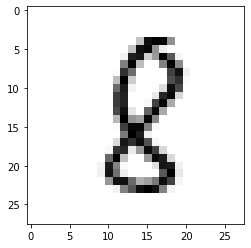

In [20]:
mlp.eval()              # turn the model to evaluate mode
index = 256
torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
image = torch_X_test[index].float().unsqueeze(0)
true_label = y_test[index]
with torch.no_grad():     # does not calculate gradient
    class_index = mlp(image).argmax()   #gets the prediction for the image's class
plt.imshow(image.numpy().reshape(28,28,1), cmap='gray_r');
print(true_label)
print(class_index)

In [21]:
torch_X_train = torch_X_train.view(-1, 1,28,28).float()
torch_X_test = torch_X_test.view(-1,1,28,28).float()
print(torch_X_train.shape)
print(torch_X_test.shape)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

torch.Size([35700, 1, 28, 28])
torch.Size([6300, 1, 28, 28])


In [22]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
cnn = CNN()
print(cnn)

it = iter(train_loader)
X_batch, y_batch = next(it)
print(cnn.forward(X_batch).shape)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([32, 10])


In [23]:
fit(cnn,train_loader)

Epoch : 0 [0/35700 (0%)]	Loss: 14.168859	 Accuracy:15.625%
Epoch : 0 [1600/35700 (4%)]	Loss: 1.717582	 Accuracy:20.650%
Epoch : 0 [3200/35700 (9%)]	Loss: 1.306234	 Accuracy:34.530%
Epoch : 0 [4800/35700 (13%)]	Loss: 0.978749	 Accuracy:42.695%
Epoch : 0 [6400/35700 (18%)]	Loss: 0.612131	 Accuracy:49.611%
Epoch : 0 [8000/35700 (22%)]	Loss: 1.027250	 Accuracy:55.192%
Epoch : 0 [9600/35700 (27%)]	Loss: 0.998174	 Accuracy:59.655%
Epoch : 0 [11200/35700 (31%)]	Loss: 0.607191	 Accuracy:62.999%
Epoch : 0 [12800/35700 (36%)]	Loss: 0.476898	 Accuracy:65.578%
Epoch : 0 [14400/35700 (40%)]	Loss: 0.382461	 Accuracy:67.683%
Epoch : 0 [16000/35700 (45%)]	Loss: 0.401310	 Accuracy:69.667%
Epoch : 0 [17600/35700 (49%)]	Loss: 0.527622	 Accuracy:71.172%
Epoch : 0 [19200/35700 (54%)]	Loss: 0.356775	 Accuracy:72.738%
Epoch : 0 [20800/35700 (58%)]	Loss: 0.207260	 Accuracy:74.016%
Epoch : 0 [22400/35700 (63%)]	Loss: 0.328914	 Accuracy:75.045%
Epoch : 0 [24000/35700 (67%)]	Loss: 0.266464	 Accuracy:76.044%
Epoc

9
tensor(9)


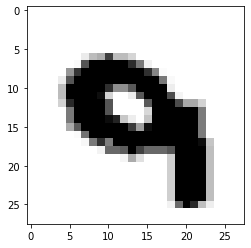

In [25]:
cnn.eval()              # turn the model to evaluate mode
index = 500
torch_X_test = torch_X_test.view(-1,1,28,28).float().type(torch.LongTensor)
image = torch_X_test[index].float().unsqueeze(0)
true_label = y_test[index]
with torch.no_grad():     # does not calculate gradient
    class_index = cnn(image).argmax()   #gets the prediction for the image's class
plt.imshow(image.numpy().reshape(28,28,1), cmap='gray_r');
print(true_label)
print(class_index)

Describe the performance of the MLP and CNN models? Performance can include training time, accuracy, etc.

In [26]:
# Training time: MLP takes much less time than CNN for traning  
# Accuracy: The accuracies of MLP and CNN on this testing set are similar, while MLP, 96.719, is a little bit higher than CNN, 95.291  
# Other: The accuracy of MLP improves very quickly in the first few steps, while the accuracy of CNN improves relatively slowly

Extra Credit: Describe the below code and the output

In [27]:
# The below code is Carlini & Wagner Attack
# The output is modified image and the new prediction

Init idx: 9
3.504579544067383 -0.062148891389369965 -3.566728353500366

Job done, breaking
tensor([-2.1355, -2.0527, -2.2630, -2.2857, -2.4815, -2.5295, -2.5151, -2.3432,
        -2.1840, -2.3550])


1

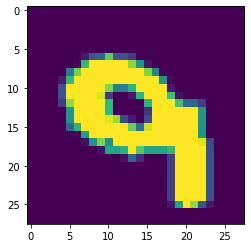

In [28]:
model = cnn
#torch_X_test = torch_X_test.view(-1,1,28,28).float().type(torch.LongTensor)
x = torch_X_test[index].float().clone()
x.requires_grad_(True)
with torch.no_grad():
    logits = model(x.unsqueeze(0)).squeeze()
    IMX = torch.argmax(logits)
print("Init idx:",IMX.item())
    
lr=.01
while True:
    logits = model(x.unsqueeze(0)).squeeze()
    
    imx = torch.argmax(logits)
    if imx!=IMX: 
        print("Job done, breaking")
        break
    y = logits.clone()
    y[imx] = -99
    loss = logits.max() - y.max() 
    loss.backward()
    
    
    x.data.sub_(lr*x.grad.data)
    print(loss.item(),logits.max().item(), y.max().item() )
    print()
    x.grad.data.zero_()
    x.data.sub_(x.data.min())
    x.data.mul_(1/x.data.max())
    
with torch.no_grad():
    print(model(x.unsqueeze(0)).squeeze())

plt.imshow(x.detach().cpu().numpy().transpose(1,2,0).reshape(28,28));torch.argmax(model(x.unsqueeze(0))).item()